# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [38]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [39]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 606


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [40]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&units=" + units + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()


        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kodiak
Processing Record 2 of Set 1 | bluff
Processing Record 3 of Set 1 | tabiauea
City not found. Skipping...
Processing Record 4 of Set 1 | bonavista
Processing Record 5 of Set 1 | ushuaia
Processing Record 6 of Set 1 | sorland
Processing Record 7 of Set 1 | lashio
Processing Record 8 of Set 1 | wattegama
Processing Record 9 of Set 1 | busselton
Processing Record 10 of Set 1 | jamestown
Processing Record 11 of Set 1 | east london
Processing Record 12 of Set 1 | mataura
Processing Record 13 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 14 of Set 1 | letterkenny
Processing Record 15 of Set 1 | katsuura
Processing Record 16 of Set 1 | zhigalovo
Processing Record 17 of Set 1 | tayoltita
Processing Record 18 of Set 1 | beloha
Processing Record 19 of Set 1 | albany
Processing Record 20 of Set 1 | rikitea
Processing Record 21 of Set 1 | nanakuli
Processing Record 22 of Set

In [41]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          560
Lat           560
Lng           560
Max Temp      560
Humidity      560
Cloudiness    560
Wind Speed    560
Country       560
Date          560
dtype: int64

In [42]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kodiak,57.7900,-152.4072,0.73,69,100,2.06,US,1675479775
1,bluff,-46.6000,168.3333,21.04,70,11,5.43,NZ,1675479776
2,bonavista,48.6499,-53.1147,-0.39,81,74,13.77,CA,1675479776
3,ushuaia,-54.8000,-68.3000,8.81,71,0,10.29,AR,1675479227
4,sorland,67.6670,12.6934,2.92,66,100,8.69,NO,1675479777


In [43]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [44]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kodiak,57.7900,-152.4072,0.73,69,100,2.06,US,1675479775
1,bluff,-46.6000,168.3333,21.04,70,11,5.43,NZ,1675479776
2,bonavista,48.6499,-53.1147,-0.39,81,74,13.77,CA,1675479776
3,ushuaia,-54.8000,-68.3000,8.81,71,0,10.29,AR,1675479227
4,sorland,67.6670,12.6934,2.92,66,100,8.69,NO,1675479777


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

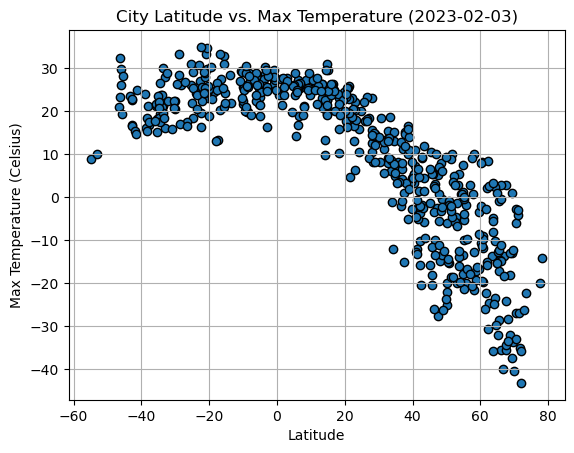

In [55]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (2023-02-03)")
plt.ylabel("Max Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

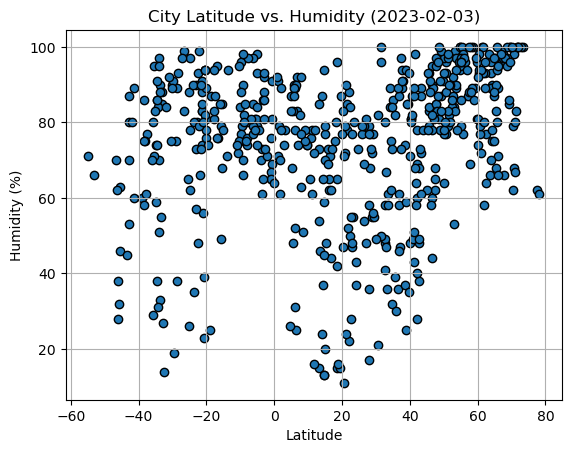

In [46]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2023-02-03)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

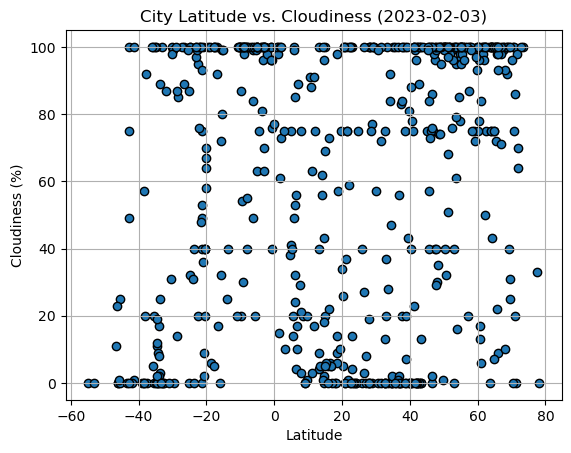

In [47]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2023-02-03)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

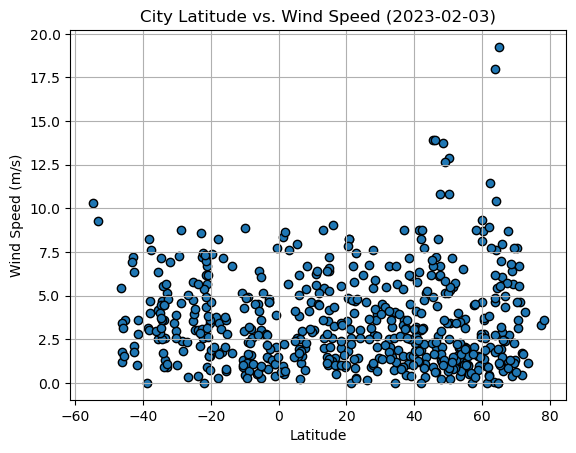

In [48]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2023-02-03)")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [49]:
# Define a function to create Linear Regression plots
def regression(x_values,y_values):
    # Perform a linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    # Get regression values
    regress_values = x_values * slope + intercept

    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    return line_eq, rvalue, regress_values

In [50]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kodiak,57.7900,-152.4072,0.73,69,100,2.06,US,1675479775
2,bonavista,48.6499,-53.1147,-0.39,81,74,13.77,CA,1675479776
4,sorland,67.6670,12.6934,2.92,66,100,8.69,NO,1675479777
5,lashio,22.9333,97.7500,22.28,47,14,0.27,MM,1675479777
6,wattegama,6.7989,81.4808,25.34,83,10,2.98,LK,1675479777


In [51]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,bluff,-46.6000,168.3333,21.04,70,11,5.43,NZ,1675479776
3,ushuaia,-54.8000,-68.3000,8.81,71,0,10.29,AR,1675479227
7,busselton,-33.6500,115.3333,30.07,33,3,2.60,AU,1675479778
9,east london,-33.0153,27.9116,22.37,85,100,5.14,ZA,1675479729
10,mataura,-46.1927,168.8643,32.37,28,0,1.22,NZ,1675479778


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7277062865241015


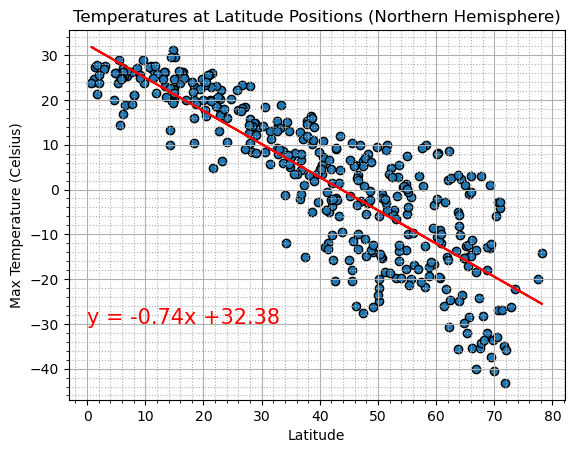

In [64]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

values = regression(x_values,y_values)
line_eq = values[0]
rvalue = values[1]
regress_values = values[2]

# Build scatter plot for latitude vs. temperature
plt.scatter(x_values, y_values, marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("Temperatures at Latitude Positions (Northern Hemisphere)")
plt.ylabel("Max Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,-30),fontsize=15,color="red")
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')

# Print r value
print(f"The r-value is: {rvalue**2}")

# Save the figure
plt.savefig("output_data/Fig5.png")

# Show plot
plt.show()

The r-value is: 0.1665898624064182


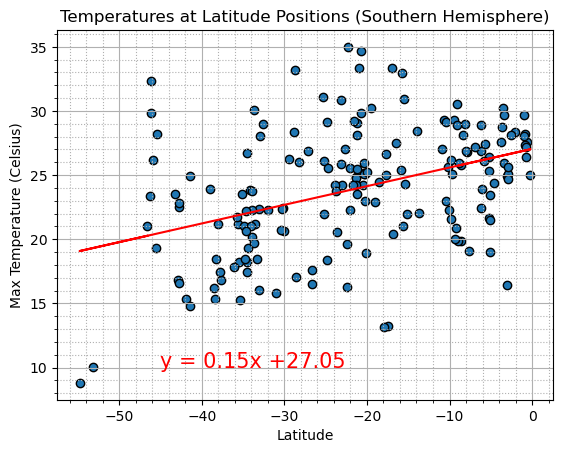

In [65]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

values = regression(x_values,y_values)
line_eq = values[0]
rvalue = values[1]
regress_values = values[2]

# Build scatter plot for latitude vs. temperature
plt.scatter(x_values, y_values, marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("Temperatures at Latitude Positions (Southern Hemisphere)")
plt.ylabel("Max Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-45,10),fontsize=15,color="red")
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')

# Print r value
print(f"The r-value is: {rvalue**2}")

# Save the figure
plt.savefig("output_data/Fig6.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.19477351180804056


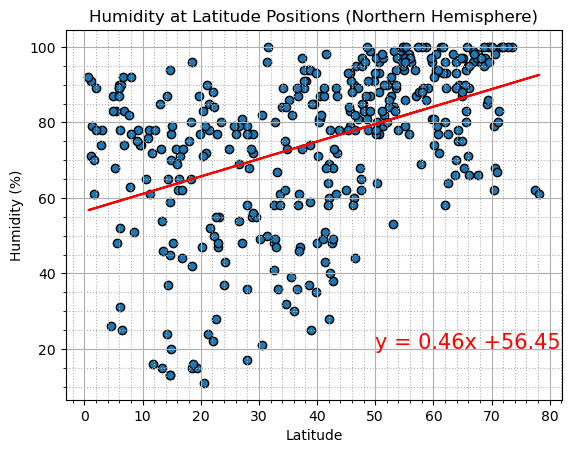

In [67]:
# Northern Hemisphere
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

values = regression(x_values,y_values)
line_eq = values[0]
rvalue = values[1]
regress_values = values[2]

# Build scatter plot for latitude vs. temperature
plt.scatter(x_values, y_values, marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("Humidity at Latitude Positions (Northern Hemisphere)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,20),fontsize=15,color="red")
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')

# Print r value
print(f"The r-value is: {rvalue**2}")

# Save the figure
plt.savefig("output_data/Fig7.png")

# Show plot
plt.show()

The r-value is: 0.08044828380040964


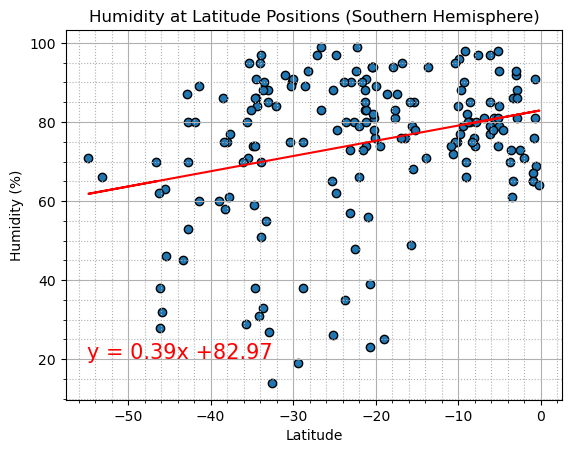

In [70]:
# Southern Hemisphere
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

values = regression(x_values,y_values)
line_eq = values[0]
rvalue = values[1]
regress_values = values[2]

# Build scatter plot for latitude vs. temperature
plt.scatter(x_values, y_values, marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("Humidity at Latitude Positions (Southern Hemisphere)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,20),fontsize=15,color="red")
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')

# Print r value
print(f"The r-value is: {rvalue**2}")

# Save the figure
plt.savefig("output_data/Fig8.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.1284753633096903


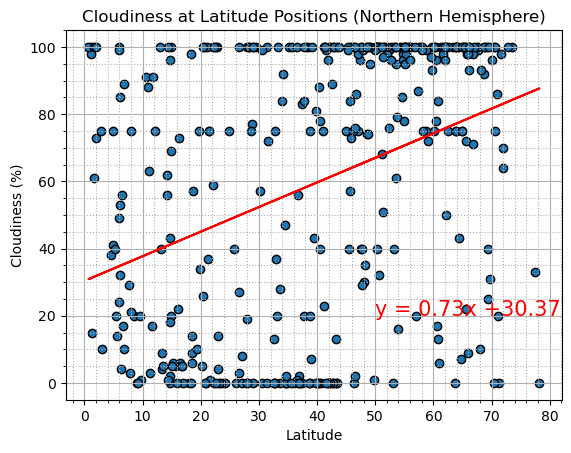

In [71]:
# Northern Hemisphere
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

values = regression(x_values,y_values)
line_eq = values[0]
rvalue = values[1]
regress_values = values[2]

# Build scatter plot for latitude vs. temperature
plt.scatter(x_values, y_values, marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("Cloudiness at Latitude Positions (Northern Hemisphere)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,20),fontsize=15,color="red")
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')

# Print r value
print(f"The r-value is: {rvalue**2}")

# Save the figure
plt.savefig("output_data/Fig9.png")

# Show plot
plt.show()

The r-value is: 0.2997868749917639


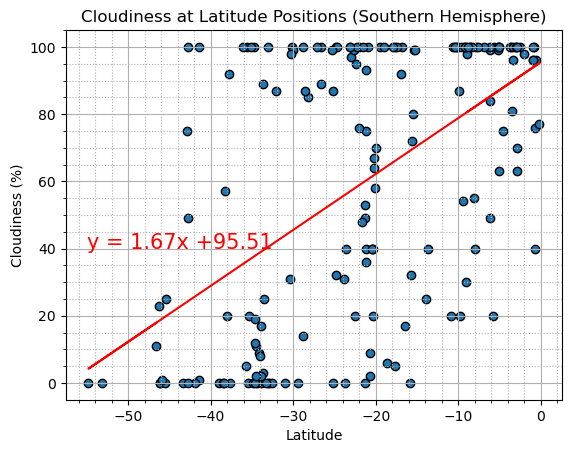

In [73]:
# Southern Hemisphere
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

values = regression(x_values,y_values)
line_eq = values[0]
rvalue = values[1]
regress_values = values[2]

# Build scatter plot for latitude vs. temperature
plt.scatter(x_values, y_values, marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("Cloudiness at Latitude Positions (Southern Hemisphere)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,40),fontsize=15,color="red")
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')

# Print r value
print(f"The r-value is: {rvalue**2}")

# Save the figure
plt.savefig("output_data/Fig10.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.0012369771450459817


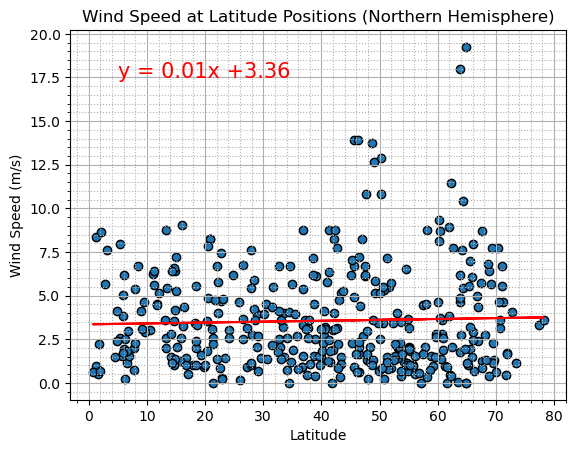

In [75]:
# Northern Hemisphere
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

values = regression(x_values,y_values)
line_eq = values[0]
rvalue = values[1]
regress_values = values[2]

# Build scatter plot for latitude vs. temperature
plt.scatter(x_values, y_values, marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("Wind Speed at Latitude Positions (Northern Hemisphere)")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,17.5),fontsize=15,color="red")
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')

# Print r value
print(f"The r-value is: {rvalue**2}")

# Save the figure
plt.savefig("output_data/Fig11.png")

# Show plot
plt.show()

The r-value is: 0.06881595118078632


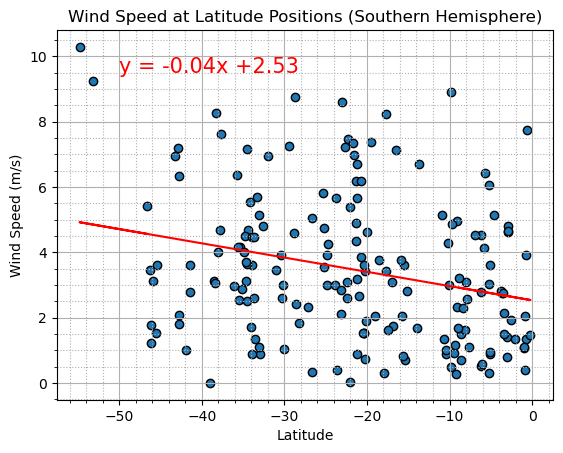

In [77]:
# Southern Hemisphere
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

values = regression(x_values,y_values)
line_eq = values[0]
rvalue = values[1]
regress_values = values[2]

# Build scatter plot for latitude vs. temperature
plt.scatter(x_values, y_values, marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("Wind Speed at Latitude Positions (Southern Hemisphere)")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,9.5),fontsize=15,color="red")
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')

# Print r value
print(f"The r-value is: {rvalue**2}")

# Save the figure
plt.savefig("output_data/Fig12.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE